# 선형회귀

In [120]:
# 불필요한 경고 메시지 없애기 위함
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# 분석도구
import numpy as np
import pandas as pd
import sympy as sp

# 시각화도구
import matplotlib.pyplot as plt
import seaborn as sns

# 머신러닝 라이브러리(scikit-learn)
from sklearn.linear_model import LinearRegression

## 아이스크림 문제
- 온도 x에 따라 아이스크림 판매량 y를 가정

In [ ]:
x = np.array([20, 21, 22, 23, 24])
y = np.array([15, 16, 21, 33, 42])

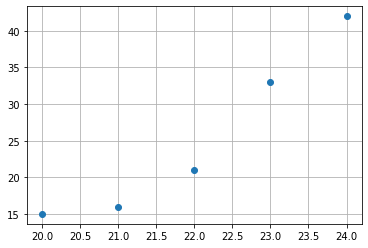

In [ ]:
plt.plot(x,y,'o') # 'o' 치면 점으로 표현
plt.grid()
plt.show()

In [ ]:
x

array([20, 21, 22, 23, 24])

In [ ]:
x.reshape(-1, 1)

array([[20],
       [21],
       [22],
       [23],
       [24]])

In [ ]:
model = LinearRegression()
model.fit( x.reshape(-1, 1), y) # x의 자료의 차원은 2차원이어야 합니다.
#x와 y를 선형회귀로 만들어주는 것

LinearRegression()

In [ ]:
print(model.coef_) #선형회귀계수, 기울기
print(model.intercept_) # 절편

[7.1]
-130.79999999999998


In [ ]:
model.score( x.reshape(-1, 1), y ) # 예측 정확도 = 91.8 %

0.9178805535324108

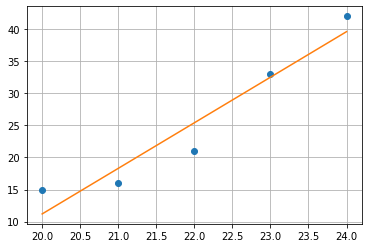

In [ ]:
plt.plot(x,y,'o') # 'o' 치면 점으로 표현
plt.plot(x,7.1*x + -130.8) # 회귀직선
plt.grid()
plt.show()

선형회귀는 그냥 선형적인 관계가 있냐 없냐먄 확인하기 용

In [ ]:
# 예측
def predict(x):
  return 7.1 * x + -130.8

In [ ]:
predict(30) # 온도 30도일때 판매량?

82.19999999999999

In [ ]:
# scikit-learn의 자체적인 predict()
model.predict([[30]]) # 입력값은 모형의 자료 차원과 동일해야함

array([82.2])

다중회귀

In [ ]:
np.random.seed(123)
x1 = np.random.randn(1000) * 50 #정규분포(randn)로부터 랜덤하게 1000개의 자료를 가져옴
x2 = np.random.randn(1000) * 50
y = 3.5 * x1 + 5 * x2 - 130 + np.random.randn(1000) * 50

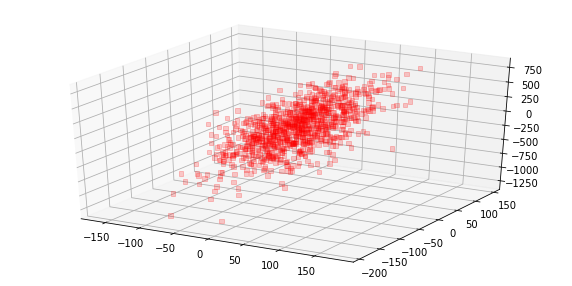

In [ ]:
# 다차원
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(projection='3d')
ax.scatter(x1, x2, y, marker=',', color='r', alpha=0.2)
plt.grid()
plt.show()

In [ ]:
two_d=pd.DataFrame(np.array([y,x1,x2]).T, columns=['y','x1','x2'])
two_d

,y,x1,x2
0,-595.903399,-54.281530,-37.441373
1,126.365269,49.867272,28.379736
2,153.871712,14.148925,35.907527
3,-600.394920,-75.314736,-49.969037
4,-188.548820,-28.930013,23.744916
...,...,...,...
995,188.742115,31.738157,42.285062
996,-270.054827,53.495930,-55.996126
997,-276.934807,-45.466351,-17.964836
998,-399.331767,23.513187,-80.484754


In [ ]:
model=LinearRegression()
model.fit(two_d[['x1','x2']],two_d['y'])

LinearRegression()

In [ ]:
#회귀계수
print(model.coef_)#베타값들
print(model.intercept_) #y절편

[3.4677746  4.98522671]
-129.5398972098281


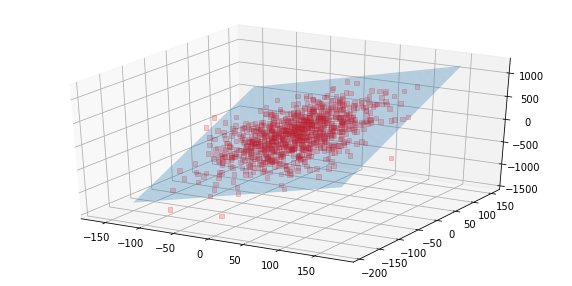

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(projection='3d')
ax.scatter(x1, x2, y, marker=',', color='r', alpha=0.2)

xx1 = np.tile(np.arange(-150, 150), (300,1))
xx2 = np.tile(np.arange(-150, 150), (300,1)).T

beta1 = model.coef_[0]
beta2 = model.coef_[1]
b = model.intercept_
yy = beta1 * xx1 + beta2 * xx2 + b
ax.plot_surface(xx1, xx2, yy, alpha=0.3)

plt.grid()
plt.show()

#변수 하나와 다른 점이라면, 변수 2개에서는 면으로 표현됨. 

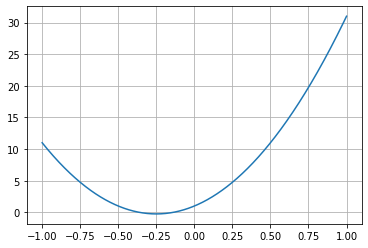

In [ ]:
#2차함수
x = np.linspace( -1, 1, 1000 )
y = 10 * x + 20 * x ** 2 + 1

plt.plot(x, y)
plt.grid()
plt.show()

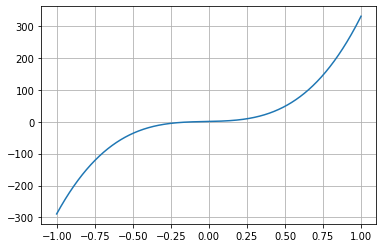

In [ ]:
# 3차함수
x = np.linspace( -1, 1, 1000 )
y = 10 * x + 20 * x ** 2 + 300 * x ** 3 + 1

plt.plot(x, y)
plt.grid()
plt.show()

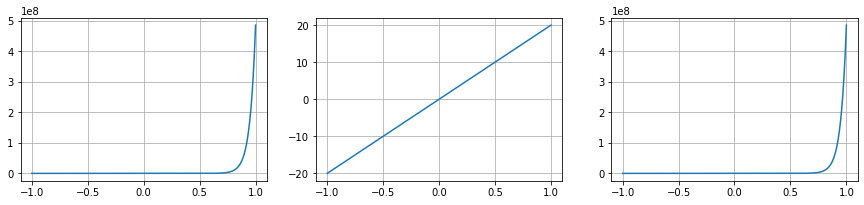

In [ ]:
# 지수함수, 로그함수는 역함수관계
x = np.linspace( -1, 1, 1000 )
y = np.exp(20 * x)

plt.figure( figsize=(15, 3) )
plt.subplot( 1, 3, 1 )
plt.plot(x, y)
plt.grid()

y = np.log(y) # 지수함수에 로그모형 씌우면 선형모형 됨
plt.subplot( 1, 3, 2 )
plt.plot(x, y)
plt.grid()

y = np.exp(y) #선형모델에 지수모형 씌우기 -> 지수모형
plt.subplot( 1, 3, 3 )
plt.plot(x, y)
plt.grid()

plt.show()

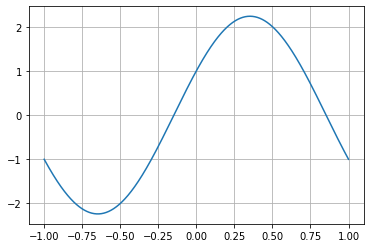

In [ ]:
# 삼각함수
x = np.linspace( -1, 1, 1000 )
y = 1 * np.cos(np.pi * x) + 2 * np.sin( np.pi * x)

plt.plot(x, y)
plt.grid()
plt.show()

## 실습

In [ ]:
np.random.seed(123)

x = np.linspace(0, 1, 1000)
y = np.sin(2 * np.pi * x) + (np.random.randn(1000)/5)

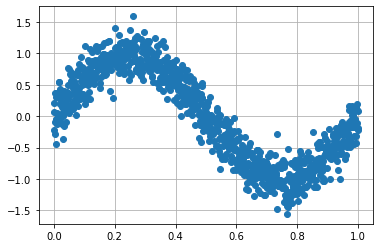

In [ ]:
plt.plot( x, y ,'o')
plt.grid()
plt.show()

과적합
- train자료를 적게, test자료를 많이
(보통은 그 반대가 좋음 7:3, 8:2 정도)

In [ ]:
np.random.seed(123)

x_train = np.linspace(0, 1, 10)
y_train = np.sin(2 * np.pi * x_train) + (np.random.randn(10)/5)

x_test = np.linspace(0, 1, 50)
y_test = np.sin(2 * np.pi * x_test) + (np.random.randn(50)/5)

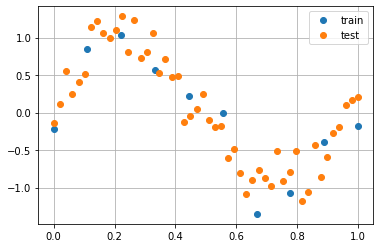

In [ ]:
plt.plot( x_train, y_train, 'o', label='train' )
plt.plot( x_test, y_test, 'o', label='test' )
plt.legend()
plt.grid()
plt.show()

###선형회귀 적용

In [ ]:
#데이터 프레임으로 변경
train=pd.DataFrame(np.array([y_train ,x_train]).T, columns=['target','x'])
train

,target,x
0,-0.217126,0.000000
1,0.842257,0.111111
2,1.041403,0.222222
3,0.564766,0.333333
4,0.226300,0.444444
5,-0.011733,0.555556
6,-1.351361,0.666667
7,-1.070590,0.777778
8,-0.389600,0.888889
9,-0.173348,1.000000


In [ ]:
test=pd.DataFrame(np.array([y_test ,x_test]).T, columns=['target','x'])
test

,target,x
0,-0.135777,0.000000
1,0.108935,0.020408
2,0.551933,0.040816
3,0.247487,0.061224
4,0.401921,0.081633
5,0.511240,0.102041
6,1.136869,0.122449
7,1.219189,0.142857
8,1.055954,0.163265
9,0.991650,0.183673


데이터프레임으로 변경하면 함수에 대입할 때 편함

In [ ]:
# train 데이터프레임 이용해서 선형회귀모형 만들기
model = LinearRegression()
model.fit( train[['x']],train['target']) 

LinearRegression()

In [ ]:
# 회귀계수
print(model.coef_)
print(model.intercept_)

[-1.35138446]
0.6217890078357454


In [ ]:
# 학습정확도 -학습자료에 대해 얼마나 잘 설명하고 있는지 보여주는 정도
model.score(train[['x']],train['target']) #34% -> 잘 설명하지 못한다! 선형관계는 없군

0.3485544757102248

In [ ]:
# 검증정확도 - 학습에 사용되지 않은 자료 이용해 정확도 확인, 예측력 좋은지 판단
model.score(test[['x']],test['target']) # 44% -> 선형적인 관계는 없는 것으로 판단됨

0.44221300473771785

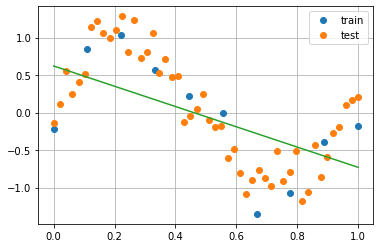

In [ ]:
plt.plot( x_train, y_train, 'o', label='train' )
plt.plot( x_test, y_test, 'o', label='test' )
plt.plot(x,model.predict(x.reshape(-1,1)))
plt.legend()
plt.grid()
plt.show()

###다항회귀 이용

####2차함수

In [ ]:
# 그림 그리기 위한 자료만 추가로 데이터프레임 생성
df=pd.DataFrame(np.array([y,x]).T,columns=['target','x'])

In [ ]:
# 2차항을 train 데이터프레임에 추가
train['x2']=train['x'] ** 2
train

,target,x,x2
0,-0.217126,0.000000,0.000000
1,0.842257,0.111111,0.012346
2,1.041403,0.222222,0.049383
3,0.564766,0.333333,0.111111
4,0.226300,0.444444,0.197531
5,-0.011733,0.555556,0.308642
6,-1.351361,0.666667,0.444444
7,-1.070590,0.777778,0.604938
8,-0.389600,0.888889,0.790123
9,-0.173348,1.000000,1.000000


In [ ]:
test['x2']=test['x'] ** 2
test.head()

,target,x,x2
0,-0.135777,0.000000,0.000000
1,0.108935,0.020408,0.000416
2,0.551933,0.040816,0.001666
3,0.247487,0.061224,0.003748
4,0.401921,0.081633,0.006664


In [ ]:
df['x2']=df['x'] ** 2
df.head()

,target,x,x2
0,-0.217126,0.000000,0.000000
1,0.205759,0.001001,0.000001
2,0.069174,0.002002,0.000004
3,-0.282392,0.003003,0.000009
4,-0.090565,0.004004,0.000016


In [ ]:
#2차함수를 이용한 다항회귀
model=LinearRegression()
model.fit(train[['x','x2']],train['target'])

LinearRegression()

In [ ]:
model.coef_ # 회귀계수 (매우 중요), 2차항은 설명력이 없다고 보여짐

array([-1.3799706 ,  0.02858614])

In [ ]:
# 학습 정확도, 검증 정확도도 크게 다르진 않을듯
print(model.score(train[['x','x2']],train['target']))
print(model.score(test[['x','x2']],test['target']))

0.34856679877894303
0.442742788081522


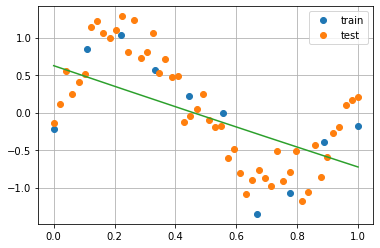

In [ ]:
plt.plot( x_train, y_train, 'o', label='train' )
plt.plot( x_test, y_test, 'o', label='test' )
plt.plot(df['x'],model.predict(df[['x','x2']]))
plt.legend()
plt.grid()
plt.show()

2차함수이지만 곡선의 형태가 안ㄴ나옴

####3차함수

In [ ]:
# 3차항을 데이터프레임에 추가
train['x3']=train['x'] ** 3
train.head()

,target,x,x2,x3
0,-0.217126,0.000000,0.000000,0.000000
1,0.842257,0.111111,0.012346,0.001372
2,1.041403,0.222222,0.049383,0.010974
3,0.564766,0.333333,0.111111,0.037037
4,0.226300,0.444444,0.197531,0.087791


In [ ]:
test['x3']=test['x'] ** 3
test.head()

,target,x,x2,x3
0,-0.135777,0.000000,0.000000,0.000000
1,0.108935,0.020408,0.000416,0.000008
2,0.551933,0.040816,0.001666,0.000068
3,0.247487,0.061224,0.003748,0.000229
4,0.401921,0.081633,0.006664,0.000544


In [ ]:
df['x3']=df['x'] ** 3
df.head()

,target,x,x2,x3
0,-0.217126,0.000000,0.000000,0.000000e+00
1,0.205759,0.001001,0.000001,1.003006e-09
2,0.069174,0.002002,0.000004,8.024048e-09
3,-0.282392,0.003003,0.000009,2.708116e-08
4,-0.090565,0.004004,0.000016,6.419238e-08


In [ ]:
#3차함수를 이용한 다항회귀
model=LinearRegression()
#model.fit(train[['x','x2','x3']],train['target'])
model.fit(train.loc[:,'x':],train['target'])

LinearRegression()

In [ ]:
model.coef_ # 회귀계수

array([ 11.1331822 , -32.95076452,  21.98623377])

In [ ]:
# 학습 정확도, 검증 정확도
# print(model.score(train[['x','x2','x3']],train['target']))
# print(model.score(test[['x','x2','x3']],test['target']))
print(model.score(train.loc[:,'x':],train['target']))
print(model.score(test.loc[:,'x':],test['target']))

0.8750448957834711
0.8814460302077375


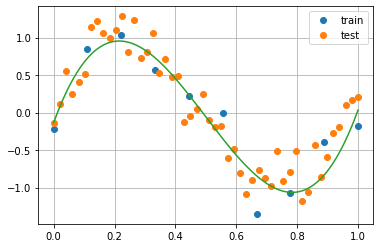

In [ ]:
plt.plot( x_train, y_train, 'o', label='train' )
plt.plot( x_test, y_test, 'o', label='test' )
plt.plot(df['x'],model.predict(df.loc[:,'x':]))
plt.legend()
plt.grid()
plt.show()

가장 ㅇ리반화된 형태의 모형 - BestFit(최적합)

#### 과적합

In [ ]:
# 3차항을 데이터프레임에 추가
train['x4']=train['x'] ** 4
train['x5']=train['x'] ** 5
train['x6']=train['x'] ** 6
train['x7']=train['x'] ** 7
train['x8']=train['x'] ** 8
train['x9']=train['x'] ** 9
train.head()

,target,x,x2,x3,x4,x5,x6,x7,x8,x9
0,-0.217126,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
1,0.842257,0.111111,0.012346,0.001372,0.000152,0.000017,0.000002,2.090752e-07,2.323057e-08,2.581175e-09
2,1.041403,0.222222,0.049383,0.010974,0.002439,0.000542,0.000120,2.676162e-05,5.947027e-06,1.321561e-06
3,0.564766,0.333333,0.111111,0.037037,0.012346,0.004115,0.001372,4.572474e-04,1.524158e-04,5.080526e-05
4,0.226300,0.444444,0.197531,0.087791,0.039018,0.017342,0.007707,3.425487e-03,1.522439e-03,6.766395e-04


In [ ]:
test['x4']=test['x'] ** 4
test['x5']=test['x'] ** 5
test['x6']=test['x'] ** 6
test['x7']=test['x'] ** 7
test['x8']=test['x'] ** 8
test['x9']=test['x'] ** 9
test.head()

,target,x,x2,x3,x4,x5,x6,x7,x8,x9
0,-0.135777,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.108935,0.020408,0.000416,0.000008,1.734665e-07,3.540133e-09,7.224762e-11,1.474441e-12,3.009064e-14,6.140946e-16
2,0.551933,0.040816,0.001666,0.000068,2.775464e-06,1.132843e-07,4.623847e-09,1.887285e-10,7.703203e-12,3.144164e-13
3,0.247487,0.061224,0.003748,0.000229,1.405079e-05,8.602524e-07,5.266851e-08,3.224603e-09,1.974247e-10,1.208722e-11
4,0.401921,0.081633,0.006664,0.000544,4.440743e-05,3.625096e-06,2.959262e-07,2.415724e-08,1.972020e-09,1.609812e-10


In [ ]:
df['x4']=df['x'] ** 4
df['x5']=df['x'] ** 5
df['x6']=df['x'] ** 6
df['x7']=df['x'] ** 7
df['x8']=df['x'] ** 8
df['x9']=df['x'] ** 9
df.head()

,target,x,x2,x3,x4,x5,x6,x7,x8,x9
0,-0.217126,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.205759,0.001001,0.000001,1.003006e-09,1.004010e-12,1.005015e-15,1.006021e-18,1.007028e-21,1.008036e-24,1.009045e-27
2,0.069174,0.002002,0.000004,8.024048e-09,1.606416e-11,3.216048e-14,6.438535e-17,1.288996e-19,2.580572e-22,5.166311e-25
3,-0.282392,0.003003,0.000009,2.708116e-08,8.132481e-11,2.442187e-13,7.333893e-16,2.202370e-18,6.613725e-21,1.986104e-23
4,-0.090565,0.004004,0.000016,6.419238e-08,2.570266e-10,1.029135e-12,4.120662e-15,1.649915e-17,6.606266e-20,2.645151e-22


In [ ]:
#n차함수를 이용한 다항회귀
model=LinearRegression()
#model.fit(train[['x','x2','x3']],train['target'])
model.fit(train.loc[:,'x':],train['target'])

LinearRegression()

In [ ]:
model.coef_ # 회귀계수, 과적합 현상) 105,-226 등등 화귀계수가 과하게 추정됨

array([ 1.05037522e+02, -2.26180928e+03,  2.13602586e+04, -1.07407073e+05,
        3.12668029e+05, -5.43220993e+05,  5.54458361e+05, -3.06230591e+05,
        7.05288240e+04])

In [ ]:
# 학습 정확도, 검증 정확도 
print(model.score(train.loc[:,'x':],train['target'])) # train 적합도는 100프로지만
print(model.score(test.loc[:,'x':],test['target'])) # 과적합 현상) test 적합도는 0에 가까움(원래 음수가 나오면 안됨), 검증 자료들에 대한 설명력이 약함

1.0
-0.09517580984249774


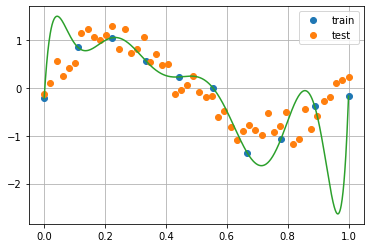

In [ ]:
plt.plot( x_train, y_train, 'o', label='train' )
plt.plot( x_test, y_test, 'o', label='test' )
plt.plot(df['x'],model.predict(df.loc[:,'x':]))
plt.legend()
plt.grid()
plt.show()

# 최적화

In [ ]:
x = np.array([20, 21, 22, 23, 24])
y = np.array([15, 16, 21, 33, 42])

## 가능도 함수

In [ ]:
# 가능도 함수
from scipy.stats import norm

# 표준편차는 샘플의 표준편차를 그대로 사용
# 각 확률의 곱
# 각 줄은 주어진 x에서 y가 될 확률이라는 뜻
sigma = np.sqrt( np.var(y) )
norm( loc= 1 * x[0] + 2, scale = sigma ).pdf(y[0]) * \
norm( loc= 1 * x[1] + 2, scale = sigma ).pdf(y[1]) * \
norm( loc= 1 * x[2] + 2, scale = sigma ).pdf(y[2]) * \
norm( loc= 1 * x[3] + 2, scale = sigma ).pdf(y[3]) * \
norm( loc= 1 * x[4] + 2, scale = sigma ).pdf(y[4]) 

#확률들의 곱이기 때문에 가능도 값이 0에 가까운 수가 될 수밖에 없음
# 따라서 다른 방법을 사용하게 됨 -> log 씌우기~

1.1441818390065927e-08

## Maximun Log Likelihood
- 확률값들의 곱에 로그 씌우기

In [ ]:
sigma = np.sqrt( np.var(y) )
np.log(norm( loc= 1 * x[0] + 2, scale = sigma ).pdf(y[0])) + \
np.log(norm( loc= 1 * x[1] + 2, scale = sigma ).pdf(y[1])) + \
np.log(norm( loc= 1 * x[2] + 2, scale = sigma ).pdf(y[2])) + \
np.log(norm( loc= 1 * x[3] + 2, scale = sigma ).pdf(y[3])) + \
np.log(norm( loc= 1 * x[4] + 2, scale = sigma ).pdf(y[4]) )


-18.285990913445413

## Maximun Log Likelihood
- 마이너스 로그값의 합

## 실습

In [ ]:
x = np.array([20, 21, 22, 23, 24])
y = np.array([15, 16, 21, 33, 42])

In [ ]:
sigma = np.sqrt( np.var(y) ) # 분산의 제곱근

def L(beta): # 최적화 추정
  likelihood = norm( beta[1] * x + beta[0], sigma).pdf(y)
  return np.sum(-np.log(likelihood))

In [ ]:
from scipy.optimize import minimize

In [ ]:
beta = np.array([0, 0])
result = minimize( L, beta )
result.x

array([-130.80034496,    7.10001519])

## 최소제곱추정법

### 직접풀이법
- 역행렬이 존재해야 사용 가능
- 정방행렬

In [ ]:
A = np.array([
  [1, 4, 2, 0],
  [9, 5, 0, 0],
  [4, 0, 2, 4],
  [6, 1, 8, 3]
])
B = np.array([15, 19, 26, 44])

In [ ]:
# 역행렬 존재유무 판별 , 0만 아니면 역행렬 존재한단 뜻
np.linalg.det(A)

853.9999999999995

In [ ]:
# 역행렬 구하기
invA=np.linalg.inv(A)
invA

array([[-0.15222482,  0.11241218, -0.03512881,  0.04683841],
       [ 0.27400468, -0.00234192,  0.06323185, -0.08430913],
       [ 0.02810304, -0.05152225, -0.1088993 ,  0.14519906],
       [ 0.1381733 , -0.08665105,  0.33957845, -0.11943794]])

In [ ]:
# 내적 구하기
np.dot(invA,B)

array([1., 2., 3., 4.])

In [ ]:
np.matmul( invA, B )

array([1., 2., 3., 4.])

In [ ]:
# 역행렬 안구하고 바로 구하기 - 조건 : 역행렬 존재

np.linalg.solve( A, B)

array([1., 2., 3., 4.])

### 반복풀이법
- 경사하강법

In [ ]:
def error(x):
  return x ** 2 - 4 * x + 6

def grad_fx(x):
  return 2*x-4

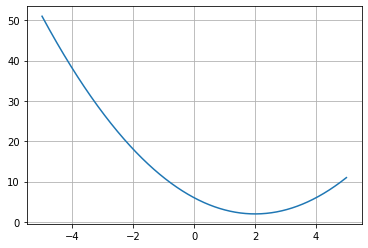

In [ ]:
x = np.linspace(-5, 5, 1000)
plt.plot( x, error(x) )
plt.grid()
plt.show()

In [ ]:
y = error(x)
min(y)

2.0000090180270362

In [ ]:
i=np.argmin(y)      # np.argmin : 최솟값의 인덱스를 찾아줌
print(x[i])         # i번째 x값이 함수의 최솟값이 됨
print(error(x[i]))  # 함수의 최솟값

1.9969969969969972
2.0000090180270362


In [ ]:
x0= -4   # 초기값
lr = 0.01 # 학습률, 얼마나 빠르게 내려갈 것인지 스탭 크기 설정
maxlter=1000 # 시행횟수
for _ in range(maxlter):
  x1=x0-lr * grad_fx(x0)
  # print('error:{}, grad : {}, x : {}'.format(error(x0),grad_fx(x0),x0))
  x0=x1

In [ ]:
x0

1.9999999899021959

그림 그려보기

In [ ]:
x0= -4   # 초기값
lr = 0.01 # 학습률, 얼마나 빠르게 내려갈 것인지 스탭 크기 설정
maxlter=1000 # 시행횟수

a=[]
for _ in range(maxlter):
  a.append(x0)
  x1=x0-lr * grad_fx(x0)
  # print('error:{}, grad : {}, x : {}'.format(error(x0),grad_fx(x0),x0))
  x0=x1

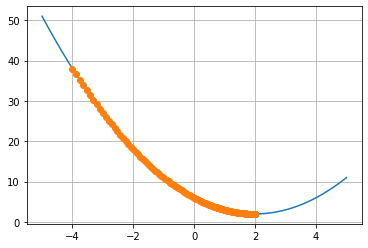

In [ ]:
a=np.array(a)
x = np.linspace(-5, 5, 1000)

plt.plot( x, error(x) )
plt.plot(a,error(a),'o')
plt.grid()
plt.show()

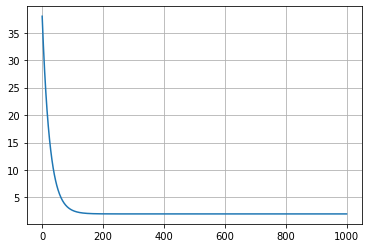

In [ ]:
# 오차함수의 함수값이 점점 줄어들고 있으니 최적화가 잘 되고 있음을 알 수 있음
plt.plot(error(a))
plt.grid()
plt.show()

#### 미분

In [ ]:
import sympy as sp

In [ ]:
def f(x):
  return 2 * x + 30

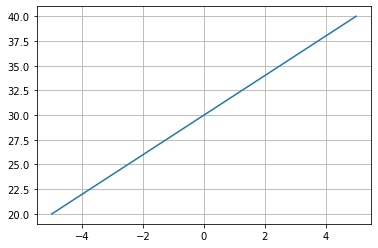

In [ ]:
x = np.linspace(-5, 5, 1000)
plt.plot( x, f(x) )
plt.grid()
plt.show()

In [ ]:
def f(x):
  return x ** 2 - 4 * x + 6

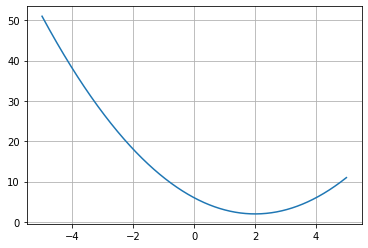

In [ ]:
x = np.linspace(-5, 5, 1000)
plt.plot( x, f(x) )
plt.grid()
plt.show()

2차함수는 구하려는 구간마다 기울기가 달라짐 -> **평균변화율**을 사용하게 됨
- 특정 구간에서의 변화량

In [ ]:
# 미분 -> 라이브러리 사용
# 변수를 수학적 기호로 바꿔서 문제 풀게 함
x=sp.Symbol('x')
f=x**2
display(f)
sp.diff(f,x)

x**2

2*x

In [ ]:
x=sp.Symbol('x')
f=x**2 - 4 *x + 6
display(f)
sp.diff(f,x)

x**2 - 4*x + 6

2*x - 4

편미분

In [ ]:
x=sp.Symbol('x')
f=x**2 - 4 *x + 6
F=sp.Matrix([f])
F.jacobian([x])

Matrix([[2*x - 4]])

### 학습률
- 학습 시간에 영향을 줌

#### 학습률 큰 경우
- hyper parameter
 - **x0, lr, maxlter**
 - 이 세가지 변수들의 적당한 값을 찾는 것이 중요함

In [ ]:
x0= -4   # 초기값
lr = 1 # 학습률, 얼마나 빠르게 내려갈 것인지 스탭 크기 설정
maxlter=100 # 시행횟수

a=[]
for _ in range(maxlter):
  a.append(x0)
  x1=x0-lr * grad_fx(x0)
  # print('error:{}, grad : {}, x : {}'.format(error(x0),grad_fx(x0),x0))
  x0=x1

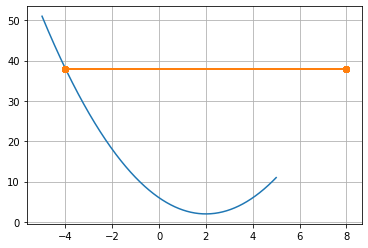

In [ ]:
a=np.array(a)
x = np.linspace(-5, 5, 1000)

plt.plot( x, error(x) )
plt.plot(a,error(a),'o-')
plt.grid()
plt.show()

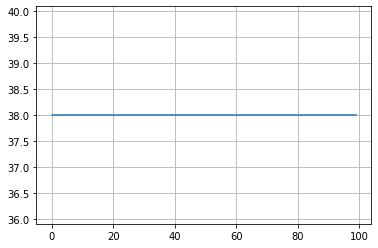

In [ ]:
# 오차함수의 함수값이 점점 줄어들고 있으니 최적화가 잘 되고 있음을 알 수 있음
plt.plot(error(a))
plt.grid()
plt.show()

과연 더 이상의 최적화가 안되는 건지 항상 파악을 해봐야 함!

In [ ]:
x0= -4   # 초기값
lr = 0.9 # 학습률, 얼마나 빠르게 내려갈 것인지 스탭 크기 설정
maxlter=100 # 시행횟수

a=[]
for _ in range(maxlter):
  a.append(x0)
  x1=x0-lr * grad_fx(x0)
  # print('error:{}, grad : {}, x : {}'.format(error(x0),grad_fx(x0),x0))
  x0=x1

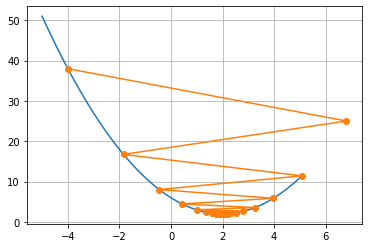

In [ ]:
a=np.array(a)
x = np.linspace(-5, 5, 1000)

plt.plot( x, error(x) )
plt.plot(a,error(a),'o-')
plt.grid()
plt.show()

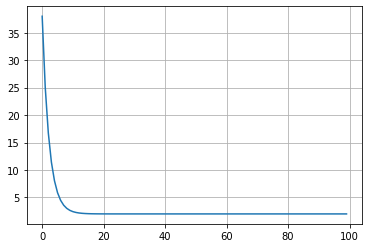

In [ ]:
# 오차함수의 함수값이 점점 줄어들고 있으니 최적화가 잘 되고 있음을 알 수 있음
plt.plot(error(a))
plt.grid()
plt.show()

널뛰지만 최소화되는 값으로 나아가긴 함 ,,, 매우 주의해야하는 상황임!

In [ ]:
x0= -4   # 초기값
lr = 0.5 # 학습률, 얼마나 빠르게 내려갈 것인지 스탭 크기 설정
maxlter=100 # 시행횟수

a=[]
for _ in range(maxlter):
  a.append(x0)
  x1=x0-lr * grad_fx(x0)
  # print('error:{}, grad : {}, x : {}'.format(error(x0),grad_fx(x0),x0))
  x0=x1

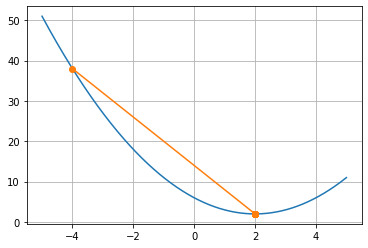

In [ ]:
a=np.array(a)
x = np.linspace(-5, 5, 1000)

plt.plot( x, error(x) )
plt.plot(a,error(a),'o-')
plt.grid()
plt.show()

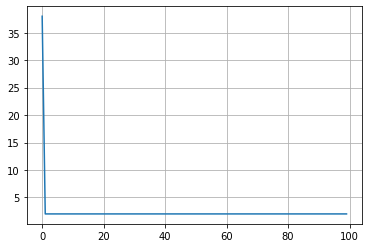

In [ ]:
# 오차함수의 함수값이 점점 줄어들고 있으니 최적화가 잘 되고 있음을 알 수 있음
plt.plot(error(a))
plt.grid()
plt.show()

#### 학습률 작은 경우

In [ ]:
x0= -4   # 초기값
lr = 0.001 # 학습률, 얼마나 빠르게 내려갈 것인지 스탭 크기 설정
maxlter=1000 # 시행횟수

a=[]
for _ in range(maxlter):
  a.append(x0)
  x1=x0-lr * grad_fx(x0)
  # print('error:{}, grad : {}, x : {}'.format(error(x0),grad_fx(x0),x0))
  x0=x1

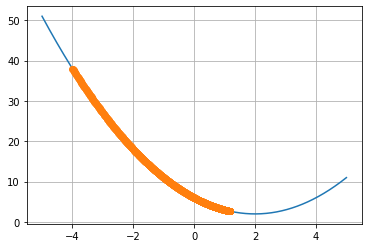

In [ ]:
a=np.array(a)
x = np.linspace(-5, 5, 1000)

plt.plot( x, error(x) )
plt.plot(a,error(a),'o-')
plt.grid()
plt.show()

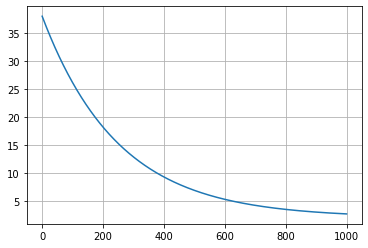

In [ ]:
# 오차함수의 함수값이 점점 줄어들고 있으니 최적화가 잘 되고 있음을 알 수 있음
plt.plot(error(a))
plt.grid()
plt.show()

## Non-convex 함수

In [ ]:
def error(x):
  return x * np.sin(x)

def grad_fx(x):
  return x * np.cos(x) + np.sin(x)

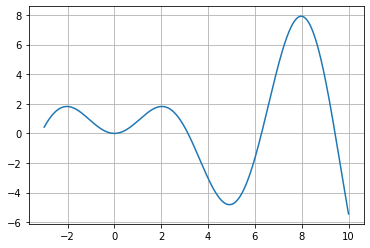

In [ ]:
x = np.linspace(-3, 10, 1000)
plt.plot( x, error(x) )
plt.grid()
plt.show()

- 이런 경우 극소 극대값이 여러개 존재하기 때문에 기울기아 0이 되는 경우가 너무 많음
- 이 상태에서 최적화 진행
 - local optimum
   - 일부 지역 최적화 진행
   - 이 경우 최적화인지 아닌지 확인이 안됨!
 - global optimum
   - 실제 최적화

밑의 경우가 local optimum

In [ ]:
x0= -2   # 초기값
lr = 0.01 # 학습률, 얼마나 빠르게 내려갈 것인지 스탭 크기 설정
maxlter=1000 # 시행횟수

a=[]
for _ in range(maxlter):
  a.append(x0)
  x1=x0-lr * grad_fx(x0)
  # print('error:{}, grad : {}, x : {}'.format(error(x0),grad_fx(x0),x0))
  x0=x1

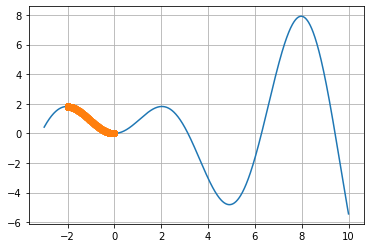

In [ ]:
a=np.array(a)
x = np.linspace(-3, 10, 1000)

plt.plot( x, error(x) )
plt.plot(a,error(a),'o-')
plt.grid()
plt.show()

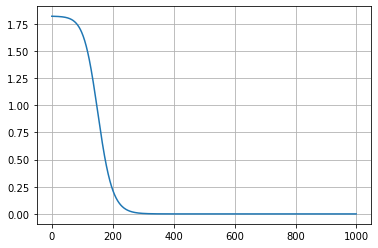

In [ ]:
# 오차함수의 함수값이 점점 줄어들고 있으니 최적화가 잘 되고 있음을 알 수 있음
plt.plot(error(a))
plt.grid()
plt.show()

이런 경우 초기값 설정이 매우 중요!!

밑의 경우가 global optimum

In [ ]:
x0= 7   # 초기값
lr = 0.01 # 학습률, 얼마나 빠르게 내려갈 것인지 스탭 크기 설정
maxlter=1000 # 시행횟수

a=[]
for _ in range(maxlter):
  a.append(x0)
  x1=x0-lr * grad_fx(x0)
  # print('error:{}, grad : {}, x : {}'.format(error(x0),grad_fx(x0),x0))
  x0=x1

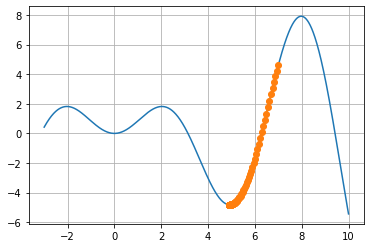

In [ ]:
a=np.array(a)
x = np.linspace(-3, 10, 1000)

plt.plot( x, error(x) )
plt.plot(a,error(a),'o-')
plt.grid()
plt.show()

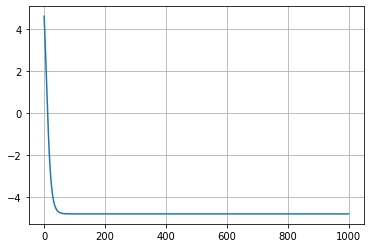

In [ ]:
# 오차함수의 함수값이 점점 줄어들고 있으니 최적화가 잘 되고 있음을 알 수 있음
plt.plot(error(a))
plt.grid()
plt.show()

- 제대로 된 최적화를 하기 위해선 모델을 여러번 만들어야 함
- 초기값, 학습률, 반복 횟수 -> **하이퍼 파라미터** 조절

## 변수 두 개일 때 최적화

In [ ]:
import sympy as sp

In [ ]:
a,b=sp.symbols('a b')
f=(a-2) ** 2 + (b-2) **2
# display(f)
# display(sp.diff(f, a))
# display(sp.diff(f, b))
F = sp.Matrix([f])
F.jacobian([a, b]).T

Matrix([
[2*a - 4],
[2*b - 4]])

In [ ]:
# 오차함수 정의
def error(a, b):
  return (a - 2) ** 2 + (b - 2) ** 2

def grad_fa(a, b):
  return 2 * a - 4

def grad_fb(a, b):
  return 2 * b - 4

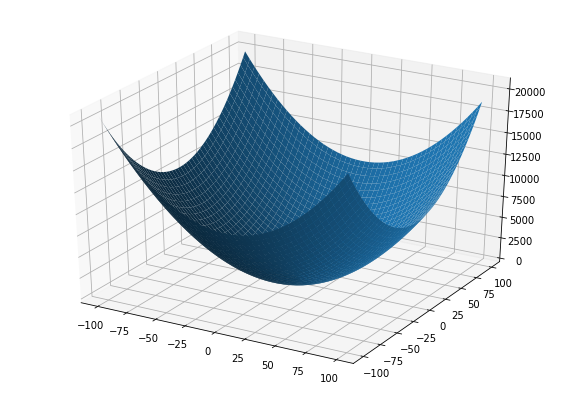

In [ ]:
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(projection='3d')

xx1, xx2 = np.meshgrid(np.arange(-100, 100), np.arange(-100, 100))
z = error(xx1, xx2)
ax.plot_surface(xx1, xx2, z)
plt.show()

(3차원은 ploty로 쉽게 그릴 수 있음~)

추정하려는 값이 여러개면 기울기 벡터 지정

In [ ]:
beta0 = np.array( [-100, 100] )

lr = 0.001
maxIter = 1000
a = []
for _ in range(maxIter):
  a.append(beta0)
  # 기울기 벡터
  grad = np.array( [ grad_fa(*beta0), grad_fb(*beta0) ] )
  beta1 = beta0 - lr * grad
  beta0 = beta1

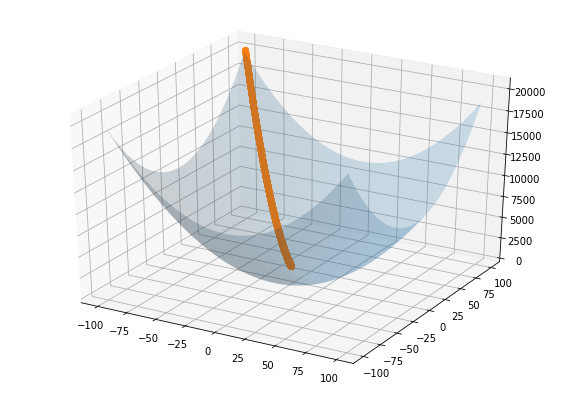

In [ ]:
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(projection='3d')

xx1, xx2 = np.meshgrid(np.arange(-100, 100), np.arange(-100, 100))
z = error(xx1, xx2)
ax.plot_surface(xx1, xx2, z, alpha=0.2)
ax.plot(np.array(a)[:,0], np.array(a)[:,1], error(np.array(a)[:,0], np.array(a)[:,1]), 'o-')
plt.show()

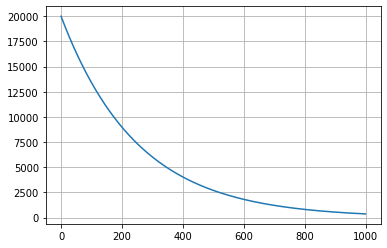

In [ ]:
plt.plot( error(np.array(a)[:,0], np.array(a)[:,1]) )
plt.grid()
plt.show()

# 아이스크림 문제
- LSE 실습

In [ ]:
x = np.array([20, 21, 22, 23, 24])
y = np.array([15, 16, 21, 33, 42])

In [ ]:
# 오차함수 정의
def error(a,b):
  return np.sum(np.square(y-(a*x+b)))

def grad_fa(a,b):
  return np.sum(-2*x*(-a*x-b+y))

def grad_fb(a,b):
  return np.sum(2*a*x+2*b-2*y)

In [ ]:
# 기울기함수
x,y,a,b=sp.symbols('x y a b')
f=(y-(a*x+b)) **2
f

(-a*x - b + y)**2

In [ ]:
F = sp.Matrix([f])
F.jacobian([a, b]).T

Matrix([
[-2*x*(-a*x - b + y)],
[  2*a*x + 2*b - 2*y]])

그래프 상으로 오차값이 작아져야 함 -> lr=0.01 -> 0.001로 수정

In [ ]:
beta0 = np.array( [0, 0] )

lr = 0.0001
maxIter = 10000
fval = []
for _ in range(maxIter):
  fval.append( error(*beta0) )
  grad = np.array( [ grad_fa(*beta0), grad_fb(*beta0) ] )
  beta1 = beta0 - lr * grad
  beta0 = beta1

In [ ]:
plt.plot( fval )
plt.grid()
plt.show()

In [ ]:
# 회귀계수
print(beta0)

오차값이 500으로 너무 큼!! 반복횟수 늘리기

In [ ]:
beta0 = np.array( [0, 0] )

lr = 0.0001
maxIter = 2000000
fval = []
for _ in range(maxIter):
  fval.append( error(*beta0) )
  grad = np.array( [ grad_fa(*beta0), grad_fb(*beta0) ] )
  beta1 = beta0 - lr * grad
  beta0 = beta1

In [ ]:
plt.plot( fval )
plt.grid()
plt.show()

In [ ]:
# 회귀 계수
print( *beta0 )

# 실습 예제

In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [ ]:
temp = np.array([32.13, 25.95, 27.95, 26.3, 26.33, 32.78, 31.48, 
    32.63, 28.2, 31.82, 25.52, 27.42, 28.92, 30.17, 
    29.09, 31.38, 29.52, 27.83, 30.27, 26.91])
elec = np.array([364.5, 105.82, 147.28, 89.57, 114.05, 411.23, 
    301.93, 386.16, 149.09, 327.93, 111.67, 130.59, 180.6, 
    214.77, 188.84, 312.11, 194.13, 135.12, 236.75, 113.6])

In [ ]:
df=pd.DataFrame(np.array([elec,temp]).T,columns=['elec','temp'])
df.sort_values(by='temp', inplace=True, ignore_index=True)
df

In [ ]:
df.plot(kind='scatter',x='temp',y='elec')
plt.grid()
plt.show()

 ## 오차함수
 ### 최대가능도 추정

In [123]:
from scipy.stats import norm

In [ ]:
# sigma = np.sqrt( np.var(elec) )
sigma=df['elec'].std()

def L(beta):
  likelihood = norm( beta[1] * temp + beta[0], sigma).pdf(elec)
  return np.sum( - np.log( likelihood ))

In [124]:
from scipy.optimize import minimize

In [ ]:
beta = np.array([0, 0])
result = minimize( L, beta )
result.x # bias, 회귀계수

In [ ]:
plt.plot( temp, elec, 'o' )
plt.plot( temp, 42.43 * temp + -1025.31, 'o')

plt.grid()
plt.show()

### 최소제곱추정

In [ ]:
# 오차함수
def error(beta):
  yhat = beta[0]+beta[1] * temp
  return np.sum((elec-yhat)**2)

In [ ]:
beta=[0,0]
result=minimize(error,beta)
result.x

### 경사하강법

기울기 함수

In [ ]:
def grad_fa(beta):
  return np.sum(-2 * temp * (-beta[1] * temp - beta[0] + elec))

def grad_fb(beta):
  return np.sum(2 * beta[1] * temp + 2 * beta[0] - 2 * elec)

In [ ]:
w = np.array( [ 0, 0 ] )
lr = 0.00001
maxIter = 2000000

f = []
for _ in range(maxIter):
  f.append( error(w) )
  grad = np.array( [ grad_fb(w), grad_fa(w) ] )
  w1 = w - lr * grad
  w = w1

In [ ]:
plt.plot( f )
plt.grid()
plt.show()

In [ ]:
w

In [ ]:
result.x

In [ ]:
df.plot(kind='scatter', x='temp', y='elec')
plt.plot( df['temp'], w[0] + w[1] * df['temp'] )
plt.grid()
plt.show()

### 비선형 모델

In [ ]:
df['temp2'] = df['temp'] ** 2
df.head(2)

에러함수 & 기울기 함수

In [ ]:
temp, elec, beta0, beta1, beta2 = sp.symbols('temp elec beta0 beta1 beta2')
f = (elec - (beta0 + beta1 * temp + beta2 * temp ** 2)) ** 2
F = sp.Matrix([f])
F.jacobian([beta0, beta1, beta2]).T

In [ ]:
def error(beta):
  yhat = beta[0] + beta[1] * df['temp'] + beta[2] * df['temp2']
  return np.sum( (df['elec'] - yhat) ** 2 )

def grad_b0(beta):
  return np.sum( 2 * beta[0] + 2 * beta[1] * df['temp'] + 2 * beta[2] * df['temp2'] - 2 * elec )

def grad_b1(beta):
  return np.sum( -2 * df['temp'] * (-beta[0] - beta[1] * df['temp'] - beta[2] * df['temp2'] + elec) )

def grad_b2(beta):
  return np.sum( -2 * df['temp2'] * (-beta[0] - beta[1] * df['temp'] - beta[2] * df['temp2'] + elec) )

In [ ]:
w = np.array( [ 0, 0, 0 ] )
lr = 0.000000001
maxIter = 1000

f = []
for _ in range(maxIter):
  f.append( error(w) )
  grad = np.array( [ grad_b0(w), grad_b1(w), grad_b2(w) ] )
  w1 = w - lr * grad
  w = w1

In [ ]:
plt.plot( f )
plt.grid()
plt.show()

In [ ]:
beta = np.array([0, 0, 0])
result = minimize( error, beta )
result.x

In [ ]:
w = result.x
df.plot(kind='scatter', x='temp', y='elec')
plt.plot( df['temp'], w[0] + w[1] * df['temp'] + w[2] * df['temp2'] )
plt.grid()
plt.show()

# 실습 예제 2

In [132]:
rawData = np.load('/content/drive/MyDrive/멀티캠퍼스/data/moore.npz')
x=rawData['X']
y=rawData['y']

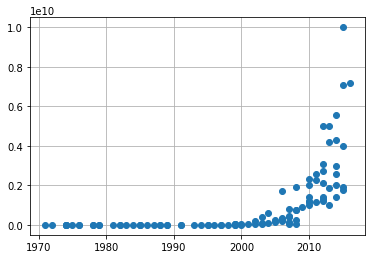

In [122]:
plt.plot(x, y, 'o')
plt.grid()
plt.show()

In [125]:
df2=pd.DataFrame(np.array([y,x]).T,columns=['y','x'])
df2.sort_values(by='x', inplace=True, ignore_index=True)
df2

,y,x
0,2300,1971
1,3500,1972
2,4500,1974
3,4100,1974
4,5000,1974
...,...,...
97,7100000000,2015
98,10000000000,2015
99,1900000000,2015
100,3990000000,2015


내가 한 것

In [ ]:
df2['x2'] = df2['x'] ** 2
df2.head(2)

,y,x,x2
0,2300,1971,3884841
1,3500,1972,3888784


In [ ]:
df2['x3'] = df2['x'] ** 3
df2.head(2)

,y,x,x2,x3
0,2300,1971,3884841,7657021611
1,3500,1972,3888784,7668682048


In [ ]:
x, y, beta0, beta1, beta2,beta3 = sp.symbols('x y beta0 beta1 beta2 beta3')
f = (y - (beta0 + beta1 * x + beta2 * x ** 2 + beta3 * x **3)) ** 2
F = sp.Matrix([f])
F.jacobian([beta0, beta1, beta2,beta3]).T

Matrix([
[ 2*beta0 + 2*beta1*x + 2*beta2*x**2 + 2*beta3*x**3 - 2*y],
[   -2*x*(-beta0 - beta1*x - beta2*x**2 - beta3*x**3 + y)],
[-2*x**2*(-beta0 - beta1*x - beta2*x**2 - beta3*x**3 + y)],
[-2*x**3*(-beta0 - beta1*x - beta2*x**2 - beta3*x**3 + y)]])

In [ ]:
def error(beta):
  yhat = beta[0] + beta[1] * df2['x'] + beta[2] * df2['x2'] + beta[3] * df2['x3']
  return np.sum( (df2['y'] - yhat) ** 2 )

In [ ]:
beta = np.array([0, 0, 0, 0])
result = minimize( error, beta )
result.x

array([ 0.00000000e+00, -5.05119188e+03, -3.93016747e+04,  1.97838621e+01])

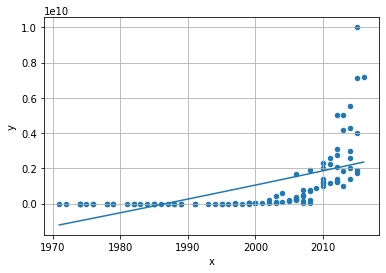

In [ ]:
w = result.x
df2.plot(kind='scatter', x='x', y='y')
plt.plot( df2['x'], w[0] + w[1] * df2['x'] + w[2] * df2['x2']  + w[3] * df2['x3'])
plt.grid()
plt.show()